# Chattermill Challenge

## Tiago Cabo
### 10 Sept 2018


In [533]:
#File import
import pandas as pd 
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import csv

In [534]:
#import csv
df = pd.read_csv('reddit_exercise_data.csv')
# deal with newlines within the review column
df = df.replace('\r\n',' ', regex=True) 

In [535]:
df.head(5)

,title,review,product_name,iso,score,date,app_bought,money_spent
0,Love it!,I use this app to read r/nosleep stories befor...,Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,47,140
1,•••,Dank memes,Reddit Official App: Trending News and Hot Topics,MY,5,17-7-10 0:0:0,3,10
2,Very good app,"Love the app, makes using Reddit very convenient",Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,61,182
3,CNN here,As the CEO of CNN I find this app repulsive. A...,Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,3,6
4,Easy peasy!,"I was infrequent in my visits, mainly mobile w...",Reddit Official App: Trending News and Hot Topics,US,5,17-7-10 0:0:0,59,178


In [536]:
#Check for empty cells
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
title           5000 non-null object
review          5000 non-null object
product_name    5000 non-null object
iso             5000 non-null object
score           5000 non-null int64
date            5000 non-null object
app_bought      5000 non-null int64
money_spent     5000 non-null int64
dtypes: int64(3), object(5)
memory usage: 312.6+ KB


Considering the above info, there are no empty values.

In [537]:
df['date'] = pd.to_datetime(df['date'])
#Convert dates into datetime object in order to reduce dataframe size. There were no visible results

In [538]:
#Check the number od unique scores in order to see if it is valuable to change the type for category
df['score'].nunique()


5

In [539]:
df['score'] = df['score'].astype('category')


before 312.6 after 278.6


In [540]:
df['iso'].nunique()

81

81 uniques on 5000 --- replace type to categories

In [541]:
df['iso'] = df['iso'].astype('category')

before 278.6 then 247.5

In [542]:
df['product_name'] = df['product_name'].astype('category')

before 247.5 after 213.5

In [543]:
#Function to add buckets
def convert_to_string_and_add_euros(value):
    return str(value) + ' €'

df['money_spent_bucket']  = df['money_spent'].apply(convert_to_string_and_add_euros)
   

In [544]:
df.head()

,title,review,product_name,iso,score,date,app_bought,money_spent,money_spent_bucket
0,Love it!,I use this app to read r/nosleep stories befor...,Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,47,140,140 €
1,•••,Dank memes,Reddit Official App: Trending News and Hot Topics,MY,5,2010-07-17,3,10,10 €
2,Very good app,"Love the app, makes using Reddit very convenient",Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,61,182,182 €
3,CNN here,As the CEO of CNN I find this app repulsive. A...,Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,3,6,6 €
4,Easy peasy!,"I was infrequent in my visits, mainly mobile w...",Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,59,178,178 €


In [545]:
#Function to add buckets
def convert_to_string_and_add_app(value):
    return str(value) + ' apps'

df['app_bought_bucket']  = df['app_bought'].apply(convert_to_string_and_add_app)
df.head()

,title,review,product_name,iso,score,date,app_bought,money_spent,money_spent_bucket,app_bought_bucket
0,Love it!,I use this app to read r/nosleep stories befor...,Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,47,140,140 €,47 apps
1,•••,Dank memes,Reddit Official App: Trending News and Hot Topics,MY,5,2010-07-17,3,10,10 €,3 apps
2,Very good app,"Love the app, makes using Reddit very convenient",Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,61,182,182 €,61 apps
3,CNN here,As the CEO of CNN I find this app repulsive. A...,Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,3,6,6 €,3 apps
4,Easy peasy!,"I was infrequent in my visits, mainly mobile w...",Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,59,178,178 €,59 apps


In [546]:
df.head()

,title,review,product_name,iso,score,date,app_bought,money_spent,money_spent_bucket,app_bought_bucket
0,Love it!,I use this app to read r/nosleep stories befor...,Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,47,140,140 €,47 apps
1,•••,Dank memes,Reddit Official App: Trending News and Hot Topics,MY,5,2010-07-17,3,10,10 €,3 apps
2,Very good app,"Love the app, makes using Reddit very convenient",Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,61,182,182 €,61 apps
3,CNN here,As the CEO of CNN I find this app repulsive. A...,Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,3,6,6 €,3 apps
4,Easy peasy!,"I was infrequent in my visits, mainly mobile w...",Reddit Official App: Trending News and Hot Topics,US,5,2010-07-17,59,178,178 €,59 apps


In [547]:
# Export a csv with the changes
df.to_csv('Reddit_edited.csv',sep='§', na_rep='NaN')

In [548]:
conn = sqlite3.connect('exercise_database.db')
c = conn.cursor()

#Delete already existed table
c.execute('''DROP TABLE if exists reddit''')

# Create table
c.execute('''CREATE TABLE reddit
             (ID Primary key not null,
             title text ,
             review text , 
             product_name text, 
             iso text,
             score integer,
             date real,
             apps_bought integer,
             money_spent integer,
             money_spent_bucket text,
             apps_bought_bucket text)''')
    
# Save (commit) the changes
conn.commit()
conn.close()

In [549]:
# Load the CSV file into CSV reader
csvfile = open('Reddit_edited.csv')
creader = csv.reader(csvfile, delimiter='§',quotechar='|')
next(creader) # skip header


['',
 'title',
 'review',
 'product_name',
 'iso',
 'score',
 'date',
 'app_bought',
 'money_spent',
 'money_spent_bucket',
 'app_bought_bucket']

In [550]:
conn = sqlite3.connect('exercise_database.db')
c = conn.cursor()

# Iterate through the CSV reader, inserting values into the database

for t in creader:
    c.execute('INSERT INTO  reddit VALUES (?,?,?,?,?,?,?,?,?,?,?)', t )
    
    conn.commit()
conn.close()

In [551]:
#Check the presence of data in the database
conn = sqlite3.connect('exercise_database.db')
c = conn.cursor()
for row in c.execute("SELECT * FROM reddit"):
    print(row)
conn.close()

('0', 'Love it!', 'I use this app to read r/nosleep stories before bed. I love it!', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2010-07-17', 47, 140, '140 €', '47 apps')
('1', '•••', 'Dank memes', 'Reddit Official App: Trending News and Hot Topics', 'MY', 5, '2010-07-17', 3, 10, '10 €', '3 apps')
('2', 'Very good app', 'Love the app, makes using Reddit very convenient', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2010-07-17', 61, 182, '182 €', '61 apps')
('3', 'CNN here', '"As the CEO of CNN I find this app repulsive. All of the violent ""memes"" about CNN could lead to one of our employees getting hurt. Please remove this app from the App Store or we are going to have an issue."', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2010-07-17', 3, 6, '6 €', '3 apps')
('4', 'Easy peasy!', "I was infrequent in my visits, mainly mobile website. But since I downloaded I get such simple notifications of things I wouldn't have known of other

('1534', 'Works really well on my small iPhone SE.', "Haven't encountered any issues. It's a smooth and attractive app!", 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2028-06-17', 59, 295, '295 €', '59 apps')
('1535', 'Same', 'Same', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2028-06-17', 94, 94, '94 €', '94 apps')
('1536', 'Amazing', 'Lets people join communities and talk with other people that like the same stuff', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2028-06-17', 17, 34, '34 €', '17 apps')
('1537', 'I love it', 'Very good app. Keeps me entertained', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2028-06-17', 9, 9, '9 €', '9 apps')
('1538', 'No sleep', '"I downloaded the app to accesss Elias Witherow\'s short stories on /nosleep instead of viewing on thoughtcatalog.com because the app promised it would be faster, and it was! If you love horror check him out. Buy his new book ""The Black Farm"" if you read

('2341', '5 stars!!', 'This is absolutely great! 😁', 'Reddit Official App: Trending News and Hot Topics', 'GB', 5, '2014-06-17', 18, 18, '18 €', '18 apps')
('2342', 'Fun app/site', 'Really cool site and app to read about, get opinions on, hear a new perspective or get some humor on pretty much any thing under the sun.', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2014-06-17', 77, 154, '154 €', '77 apps')
('2343', 'A Facebook for kids', 'Have not really ran in to a lot of bad looking words or things', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2014-06-17', 65, 130, '130 €', '65 apps')
('2344', 'Eh ouais', "L'application est lourde", 'Reddit Official App: Trending News and Hot Topics', 'FR', 5, '2014-06-17', 61, 244, '244 €', '61 apps')
('2345', 'Great app', 'Great app, very functional', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2014-06-17', 68, 68, '68 €', '68 apps')
('2346', 'Fantastic App', "I recommend Reddit to probably two

('3789', 'Works as it should.', 'Has a night mode.', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2017-06-01', 45, 135, '135 €', '45 apps')
('3790', 'Best app I use!', '10/10 would app again', 'Reddit Official App: Trending News and Hot Topics', 'GB', 5, '2017-06-01', 40, 160, '160 €', '40 apps')
('3791', 'Reddit', 'Best social media site to dat', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2017-06-01', 56, 280, '280 €', '56 apps')
('3792', 'Melons', 'Are my favorite', 'Reddit Official App: Trending News and Hot Topics', 'US', 5, '2017-06-01', 19, 57, '57 €', '19 apps')
('3793', 'Pretty good', 'Like, really good', 'Reddit Official App: Trending News and Hot Topics', 'GB', 5, '2017-06-01', 76, 76, '76 €', '76 apps')
('3794', 'Sick', 'Love this app', 'Reddit Official App: Trending News and Hot Topics', 'GB', 5, '2017-06-01', 85, 255, '255 €', '85 apps')
('3795', 'Better than mobile.', 'Could be better.', 'Reddit Official App: Trending News and Hot Top

In [552]:
#Average Iso
conn = sqlite3.connect('exercise_database.db')
c = conn.cursor()
c.execute('SELECT iso, avg(score) FROM reddit group by iso')
#store the query
d = c.fetchall()
iso = []
avg_score= []

for i in range(len(d)-1):
    iso.append(data[i][0])
    avg_score.append(data[i][1])
    
avg_score_data_frame = pd.DataFrame({'date':iso,'score':avg_score})

conn.close()

#create the scsv
avg_score_data_frame.to_csv('avg_score_data_frame.csv')

avg_score_data_frame.head()

,date,score
0,0 apps,2
1,1 apps,5
2,10 apps,5
3,100 apps,5
4,11 apps,5


In [553]:
#Avg score by app bucket
conn = sqlite3.connect('exercise_database.db')
c = conn.cursor()
c.execute('SELECT apps_bought_bucket, max(score) FROM reddit group by apps_bought_bucket')
# store the results
data = c.fetchall()

apps_bought = []
max_score= []
#separate the results into two lists
for i in range(len(data)-1):
    apps_bought.append(data[i][0])
    max_score.append(data[i][1])

#create dataframe
max_score_data_frame = pd.DataFrame({'date':apps_bought,'score':max_score})

conn.close()
# create csv
max_score_data_frame.to_csv('avg_score_data.csv')
max_score_data_frame.head()


,date,score
0,0 apps,2
1,1 apps,5
2,10 apps,5
3,100 apps,5
4,11 apps,5


,date,score
0,2001-07-17,4.718750
1,2002-07-17,4.689655
2,2003-06-17,4.758621
3,2003-07-17,4.734513
4,2004-06-17,4.610000


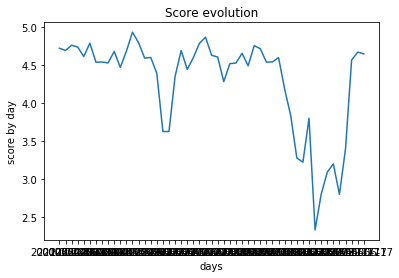

In [557]:
#Avg score by day

conn = sqlite3.connect('exercise_database.db')
c = conn.cursor()
c.execute('SELECT date, avg(score) FROM reddit group by date order by date')
#store the results
u = c.fetchall()

date = []
score= []
for i in range(len(u)-1):
    date.append(u[i][0])
    score.append(u[i][1])

#plot the results
plt.plot(date,score)
plt.ylabel('score by day')
plt.xlabel('days')
plt.title('Score evolution')
score_data_frame = pd.DataFrame({'date':date,'score':score})

conn.close()
#create csv
score_data_frame.to_csv('score_data_frame.csv')
score_data_frame.head()